<h2>Predicting Heart Attack Risk</h2>
<h3>Notebook 5: Advanced Modeling</h3>
<p><b>Author: Nikhar Bhavsar</b></p>

<hr>


### Table of Contents
1. [Importing Libraries](#importing-libraries)
2. [Loading Data](#loading-data)
3. [Resample Data](#resample-data)
4. [Advanced Modeling](#advanced_modeling)
5. [Conclusion](#conclusion)

### Importing Libraries

In [4]:
import sys
import os
sys.path.append(os.path.abspath('../utilities'))
import global_utils
import pre_processing_utils
import model_training_utils

In [5]:
import numpy as np  
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Data Preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import joblib as jb
preprocessor = jb.load('../models/preprocessor.pkl')

### Loading Data

In [7]:
patient_health_train = global_utils.import_csv('./../data/test_train/heart_attack_train.csv')
patient_health_train_encoded = global_utils.import_csv('./../data/test_train/heart_attack_train_encoded.csv')
patient_health_test = global_utils.import_csv('./../data/test_train/heart_attack_test.csv')
patient_health_test_encoded = global_utils.import_csv('./../data/test_train/heart_attack_test_encoded.csv')
heart_attack_status_train = global_utils.import_csv('./../data/test_train/heart_attack_train_target.csv',)
heart_attack_status_test = global_utils.import_csv('./../data/test_train/heart_attack_test_target.csv')

global_utils.define_df_settings()

Let's look at the columns which are present into our dataset.

In [9]:
patient_health_train.head(10)

,State,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers
0,Ohio,Male,Very good,No,7.0,No,No,No,No,Yes,No,Former smoker,Yes,White,45-49,1.88,95.25,26.96,Yes
1,Wisconsin,Female,Fair,Yes,8.0,No,No,No,Yes,No,Yes,Never smoked,Yes,White,55-59,1.68,79.38,28.25,Yes
2,South Dakota,Male,Good,Yes,7.0,No,No,No,No,Yes,No,Former smoker,Yes,White,65-69,1.80,95.25,29.29,Yes
3,Idaho,Male,Very good,Yes,7.0,No,No,No,No,No,No,Never smoked,No,White,18-24,1.73,63.50,21.29,No
4,Indiana,Male,Poor,No,7.0,No,No,No,No,Yes,Yes,Former smoker,No,Hispanic,60-64,1.50,53.07,23.63,Yes
5,Virginia,Female,Very good,Yes,7.0,No,No,No,No,No,No,Never smoked,Yes,White,60-64,1.68,56.70,20.18,Yes
6,Michigan,Male,Very good,Yes,7.0,No,No,No,No,Yes,No,Former smoker,Yes,White,45-49,1.85,108.86,31.66,Yes
7,Florida,Female,Good,Yes,7.0,No,No,No,No,No,Yes,Never smoked,Yes,White,75-79,1.57,41.28,16.64,No
8,Maryland,Male,Excellent,Yes,7.0,No,No,No,No,Yes,No,Never smoked,No,White,65-69,1.78,83.91,26.54,Yes
9,Colorado,Female,Fair,Yes,6.0,No,Yes,No,No,Yes,No,Former smoker,No,Hispanic,55-59,1.65,66.22,24.30,No


In [10]:
heart_attack_status_train.shape

(196599, 1)

### Resample Data

As we have seen in our baseline model that the parameter for handaling the class imbalance had gave us a little better result for our model.
Let's handle the class imbalance in a right way by sing SMOTE-Tomek technique. 

In [13]:
smt = SMOTETomek(random_state=42)
patient_health_resampled, heart_attack_resampled = smt.fit_resample(patient_health_train_encoded, heart_attack_status_train)
heart_attack_resampled.value_counts(normalize=True)

HadHeartAttack
0                 0.5
1                 0.5
Name: proportion, dtype: float64

Let's try to fit our base-modal again on the resampled data and try to find out if it is improved or not.

In [15]:
# Build pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the model
pipeline.fit(patient_health_resampled, heart_attack_resampled)

# Predict
heart_attack_status_pred = pipeline.predict(patient_health_test_encoded)
heart_attack_status_proba = pipeline.predict_proba(patient_health_test_encoded)[:, 1] 

# Evaluation
print("Accuracy:", accuracy_score(heart_attack_status_test, heart_attack_status_pred))

print("Precision:", precision_score(heart_attack_status_test, heart_attack_status_pred))
print("Recall:", recall_score(heart_attack_status_test, heart_attack_status_pred))
print("F1 Score:", f1_score(heart_attack_status_test, heart_attack_status_pred))
print("ROC AUC:", roc_auc_score(heart_attack_status_test, heart_attack_status_proba))

print("\nClassification Report:\n", classification_report(heart_attack_status_test, heart_attack_status_pred))

/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.830498474059003
Precision: 0.2079453755431409
Recall: 0.7486033519553073
F1 Score: 0.32547971824143795
ROC AUC: 0.8837407624048136

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90     46465
           1       0.21      0.75      0.33      2685

    accuracy                           0.83     49150
   macro avg       0.60      0.79      0.61     49150
weighted avg       0.94      0.83      0.87     49150



The results are almost the same when we are using the pipeline parameter. Let's try to resample using the SMOTE + Edited Nearest Neighbours (removes noisy majority points) technique to see if we have any improvements.

In [17]:
smenn = SMOTEENN(random_state=42)
patient_health_resampled, heart_attack_resampled = smenn.fit_resample(patient_health_train_encoded, heart_attack_status_train)
heart_attack_resampled.value_counts(normalize=True)

HadHeartAttack
1                 0.561663
0                 0.438337
Name: proportion, dtype: float64

In [18]:
# Build pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('logreg', LogisticRegression(max_iter=1000))
])

# Fit the model
pipeline.fit(patient_health_resampled, heart_attack_resampled)

# Predict
heart_attack_status_pred = pipeline.predict(patient_health_test_encoded)
heart_attack_status_proba = pipeline.predict_proba(patient_health_test_encoded)[:, 1] 

# Evaluation
print("Accuracy:", accuracy_score(heart_attack_status_test, heart_attack_status_pred))

print("Precision:", precision_score(heart_attack_status_test, heart_attack_status_pred))
print("Recall:", recall_score(heart_attack_status_test, heart_attack_status_pred))
print("F1 Score:", f1_score(heart_attack_status_test, heart_attack_status_pred))
print("ROC AUC:", roc_auc_score(heart_attack_status_test, heart_attack_status_proba))

print("\nClassification Report:\n", classification_report(heart_attack_status_test, heart_attack_status_pred))

/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7484638860630722
Precision: 0.15941722972972974
Recall: 0.8435754189944135
F1 Score: 0.26815840880838215
ROC AUC: 0.8852546308959649

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85     46465
           1       0.16      0.84      0.27      2685

    accuracy                           0.75     49150
   macro avg       0.57      0.79      0.56     49150
weighted avg       0.94      0.75      0.82     49150



This has improved our recall score for the people who had the heart attack. It is better to use this techique in our pipeline. 

Now it's time to get the sample data from our train dataset to findout the best-fit advanced model.

In [21]:
patient_health_sample_,_,heart_attack_status_sample_,_ = train_test_split(patient_health_train, heart_attack_status_train,train_size=0.30, stratify=heart_attack_status_train, random_state=42)

In [22]:
heart_attack_status_sample_.tail(20)

,HadHeartAttack
176151,0
82560,0
7669,0
118914,0
76898,0
145740,0
171850,1
119936,0
85791,0
7735,0


### Advanced Modeling

Now it's time to use the different ML algorithms to give us the better prediction. Here i have selected below ML techniques with the parameters.

<b>1. Random Forest</b>
   
Random Forest is a powerful ensemble tree-based model.class_weight='balanced' adjusts the weights inversely to class frequencies, so the model pays more attention to the minority class (heart attack = 1).
This helps in reducing bias toward the majority class (no heart attack).

<b>2. XGBoost </b>

XGBoost is a gradient boosting model—excellent for tabular and imbalanced datasets. And in our case of imbalanced dataset. This is the best choice.

scale_pos_weight=19: Since my dataset has almost 5% positive class, the ratio is about 95:5 -> 95/5 is almost 19. This tells XGBoost to give 19× more weight to the minority class, helping balance the focus.

<b>3. LightGBM with class_weight='balanced' </b>

LightGBM is a fast, efficient gradient boosting algorithm, often faster than XGBoost.


================= Random Forest =================


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: 

Threshold achieving recall ≥ 0.80: 0.45
Best Params: {'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Threshold Used: 0.45
Recall (Heart Attack): 0.80
Precision (Heart Attack): 0.18
F1 Score (Heart Attack): 0.30
ROC AUC: 0.88
PR AUC (Heart Attack): 0.37
Full Report:
                  precision    recall  f1-score   support

No Heart Attack       0.99      0.79      0.88     46465
   Heart Attack       0.18      0.80      0.30      2685

       accuracy                           0.79     49150
      macro avg       0.58      0.80      0.59     49150
   weighted avg       0.94      0.79      0.85     49150


================= Logistic Regression =================


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWar

Threshold achieving recall ≥ 0.80: 0.51
Best Params: {'clf__C': 0.01, 'clf__penalty': 'l2'}
Threshold Used: 0.51
Recall (Heart Attack): 0.80
Precision (Heart Attack): 0.18
F1 Score (Heart Attack): 0.29
ROC AUC: 0.88
PR AUC (Heart Attack): 0.40
Full Report:
                  precision    recall  f1-score   support

No Heart Attack       0.99      0.79      0.88     46465
   Heart Attack       0.18      0.80      0.29      2685

       accuracy                           0.79     49150
      macro avg       0.58      0.80      0.59     49150
   weighted avg       0.94      0.79      0.85     49150


================= XGBoost =================


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:22:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:25:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:28:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:31:48] WARNING: /Users/runner/work/xgboost/xgboost/

Threshold achieving recall ≥ 0.80: 0.91
Best Params: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'clf__subsample': 1.0}
Threshold Used: 0.91
Recall (Heart Attack): 0.82
Precision (Heart Attack): 0.15
F1 Score (Heart Attack): 0.25
ROC AUC: 0.86
PR AUC (Heart Attack): 0.42
Full Report:
                  precision    recall  f1-score   support

No Heart Attack       0.99      0.73      0.84     46465
   Heart Attack       0.15      0.82      0.25      2685

       accuracy                           0.73     49150
      macro avg       0.57      0.77      0.54     49150
   weighted avg       0.94      0.73      0.80     49150


================= LightGBM =================


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37158, number of negative: 28172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19508
[LightGBM] [Info] Number of data points in the train set: 65330, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37154, number of negative: 28042
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19572
[LightGBM] [Info] Number of data points in the train set: 65196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 37160, number of negative: 28115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19528
[LightGBM] [Info] Number of data points in the train set: 65275, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 55729, number of negative: 42467
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19736
[LightGBM] [Info] Number of data points in the train set: 98196, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/opt/anaconda3/envs/heart_prediction_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Threshold achieving recall ≥ 0.80: 0.32
Best Params: {'clf__learning_rate': 0.01, 'clf__min_child_samples': 10, 'clf__n_estimators': 100, 'clf__num_leaves': 31}
Threshold Used: 0.32
Recall (Heart Attack): 0.80
Precision (Heart Attack): 0.18
F1 Score (Heart Attack): 0.29
ROC AUC: 0.88
PR AUC (Heart Attack): 0.48
Full Report:
                  precision    recall  f1-score   support

No Heart Attack       0.99      0.79      0.88     46465
   Heart Attack       0.18      0.80      0.29      2685

       accuracy                           0.79     49150
      macro avg       0.58      0.79      0.58     49150
   weighted avg       0.94      0.79      0.84     49150


 Top Models (Recall ≥ 70% on Heart Attack):
Random Forest: F1=0.30, Recall=0.80, Precision=0.18, Threshold=0.45
Logistic Regression: F1=0.29, Recall=0.80, Precision=0.18, Threshold=0.51
LightGBM: F1=0.29, Recall=0.80, Precision=0.18, Threshold=0.32
XGBoost: F1=0.25, Recall=0.82, Precision=0.15, Threshold=0.91

 Best Model: Ra

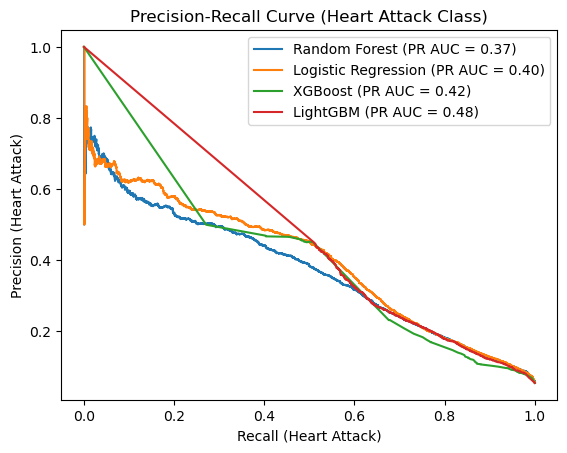

In [26]:
models = {
    "Random Forest": (
        RandomForestClassifier(class_weight='balanced', random_state=42),
        {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [5, 10, None],
            'clf__min_samples_split': [2, 5],
        }
    ),
    
    "Logistic Regression": (
        LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l1', 'l2'],
        }
    ),
    
    "XGBoost": (
        XGBClassifier(scale_pos_weight=20, use_label_encoder=False, eval_metric='logloss', random_state=42),
        {
            'clf__n_estimators': [100, 200],
            'clf__max_depth': [3, 6],
            'clf__learning_rate': [0.01, 0.1],
            'clf__subsample': [0.8, 1.0],
        }
    ),
    
    "LightGBM": (
        LGBMClassifier(class_weight='balanced', random_state=42),
        {
            'clf__n_estimators': [100, 200],
            'clf__num_leaves': [31, 50],
            'clf__learning_rate': [0.01, 0.1],
            'clf__min_child_samples': [10, 20],
        }
    ),
}

results = {}
resampler = SMOTEENN(random_state=42)

results = []

for name, (model, params) in models.items():
    result = model_training_utils.train_and_tune_model(
        name, model, params, patient_health_sample_, heart_attack_status_sample_, patient_health_test, heart_attack_status_test, preprocessor, resampler,
        min_recall=0.80
    )
    results.append(result)

# Sort by best F1 for class 1 (or change key to 'precision' or 'pr_auc')
results_sorted = sorted(results, key=lambda x: x['f1'], reverse=True)

print("\n Top Models (Recall ≥ 70% on Heart Attack):")
for r in results_sorted:
    print(f"{r['name']}: F1={r['f1']:.2f}, Recall={r['recall']:.2f}, Precision={r['precision']:.2f}, Threshold={r['threshold']:.2f}")

# Best model
best_model_info = results_sorted[0]
print(f"\n Best Model: {best_model_info['name']}")

### Conclusion

Here all models were evaluated with a strong emphasis on high recall (≥80%) to minimize missed heart attack cases. From all of them, Random Forest achieved the highest F1 score, So it will be the best choice for us for our final model. However, LightGBM showed the highest Precision-Recall AUC, indicating stronger overall performance across thresholds and better suitability for more flexible or probabilistic decision-making. But random forest steal the show this time.